In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
from sklearn.metrics import mean_squared_error

(400, 2) (400,) (4, 2)


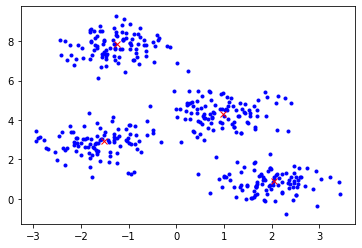

In [2]:
npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1],'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')

In [3]:
def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

In [4]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x, c):
    # centroids are shape [N,2]
    # x are shape [npoints,2]
    # add middle index to centroids to properly broadcast in math operations
    c = c[:, np.newaxis, :]  # [N,1,2]

    # calculate (x - x')**2 and (y - y')**2
    # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
    dist2 = (x - c) ** 2

    # calculate (x - x')**2 + (y - y')**2
    dist2 = dist2.sum(axis=2)  # [N,npoints]

    # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
    label = np.argmin(dist2, axis=0)  # [npoints]

    return label

In [6]:
c = initialize_centroids(x,N)
l = assign_labels(x,c)
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')

delta = 0.01
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)

step = 10
loss_history = []
iter = 0
iter_history = []
for i in range(0, 10):
    iter = iter + 1
    iter_history.append(iter)
    plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
    plt.title('step %d' % -1)
    plt.show()
    time.sleep(1)
    ipydis.clear_output(wait=True)

    centroids = get_new_centroids(x,last_labels,N)
    labels = assign_labels(x,centroids)

    loss = 0
    for dot, label in zip(x, last_labels):
        if label == 0:
            loss = loss + mean_squared_error(dot, centroids[0])
        elif label == 1:
            loss = loss + mean_squared_error(dot, centroids[1])
        elif label == 2:
            loss = loss + mean_squared_error(dot, centroids[2])
        elif label == 3:
            loss = loss + mean_squared_error(dot, centroids[3])
    print('loss: ', loss / len(x))
    loss_history.append(loss/len(x))
    # test if centroids have stopped moving
    if np.all((last_centroids - centroids) < delta):
        print('centroids unchanged as of step %d' % step)
        # done
    elif np.all(labels == last_labels):
        print('point labels unchanged as of step %d' % step)
    else:
        last_labels = labels
        last_centroids = centroids

loss:  0.3500163405544678
point labels unchanged as of step 10


We do the loop 10 times, each time we will measure the loss from MSE of each dot. The MSE is the distance between the dots and the cluster center. When the loss does not change, it means that the members of each group do not move anymore. 

accuracy:  0.4975


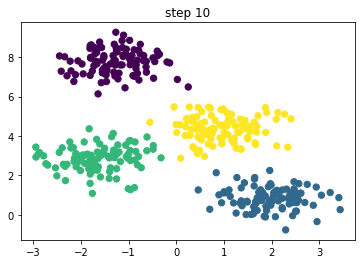

In [7]:
    # we can use the "truth" labels, cluster_labels to see how well we are doing
    # accuracy: # of points correctly labeled / total number of points
    accuracy = np.sum((cluster_labels == labels).astype(int)) / cluster_labels.shape[0]
    print('accuracy: ',accuracy)
    plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
    plt.title('step %d' % step)
    plt.show()

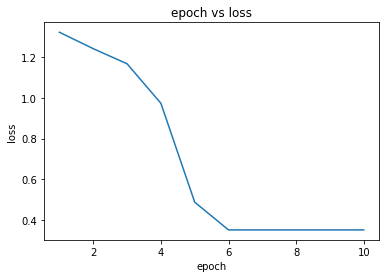

In [8]:
plt.plot(iter_history, loss_history)
plt.title('epoch vs loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()